In [1]:
#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
# import tensorflow as tf
# config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *

Cores:  12


/Users/walter/Software/anaconda3/envs/toto/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/walter/Software/anaconda3/envs/toto/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/walter/Software/anaconda3/envs/toto/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/walter/Software/anaconda3/envs/toto/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/walter/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/Users/walter

Done.


In [2]:

def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X



In [17]:
def combine_prediction(arr, initial_pred=[]):
    global s
    if ( isinstance(arr, list) ):
        for a in arr:
            combine_prediction(a, initial_pred)
        return 
    if ( len(s) > 1 ):
        s += '_'
    s += arr
    initial_pred.append(g_all_pred[arr])
    return 



def store_prediction(mrt, model, f, scaler=None, name='unnamed'):
    def getAllData(df):
        drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
        X = df.drop(drop_cols, axis=1)
#        print(df.head())
        use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
        X = df[use_cols]
        return X

    test_data = mtr.get_test_data()
    X = mtr.modified_dataset(getAllData(test_data)) #
#    X = getAdjustedDataF(test_data,f)


    if ( scaler == None ):
        Z = X
    else:
        scaler.fit(X)
        Z = scaler.transform(X)

    predictions = model.predict(Z)

    dfResult= pd.DataFrame(predictions, columns=['N1', 'N2', 'N3', 'N4', 'N5','N6', 'N7'])
#    mtr.print_predictions(dfResult)

    global df_predictions
    global prev_r
    r = mtr.getAccuracyCount(np.array(dfResult)) ;
#    if ( r > prev_r ):
#        df_predictions = []
    df_predictions.append(dfResult)
    g_all_pred.update({name : dfResult})



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from keras.models import Input, Model
import keras
from keras.layers import Dense
import time
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

df_predictions = []


all_models = []

#all_models.append(('SVCpoly01', SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=seed)))
#all_models.append(('SVCrbf010', SVC(kernel='rbf', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf011', SVC(kernel='rbf', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf012', SVC(kernel='rbf', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0103', SVC(kernel='rbf', coef0=0.75, probability=True, degree=3, random_state=seed)))
all_models.append(('SVCrbf0113', SVC(kernel='rbf', decision_function_shape='ovr', C=10, gamma=100.0, probability=False, random_state=seed)))
# all_models.append(('SVCrbf0123', SVC(kernel='rbf', coef0=0.25, probability=True, degree=3, random_state=seed)))


#all_models.append(('SVCrbf020', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf021', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf022', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0203', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0213', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0223', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf030', SVC(kernel='linear', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf031', SVC(kernel='linear', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf032', SVC(kernel='linear', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0303', SVC(kernel='linear', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0313', SVC(kernel='linear', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0323', SVC(kernel='linear', coef0=0.25, probability=True, degree=3, random_state=seed)))



# all_models.append(('LR', (LogisticRegression(random_state=seed))))

#all_models.append(('KNNC', KNeighborsClassifier()))
#all_models.append(('KNNR', KNeighborsRegressor()))
all_models.append(('RC', RidgeClassifier(random_state=seed)))
# all_models.append(('LR', LogisticRegression(random_state=seed)))
all_models.append(('LDA', LinearDiscriminantAnalysis()))
# all_models.append(('DTR', DecisionTreeRegressor()))
# all_models.append(('ETR', ExtraTreesRegressor(n_estimators=5)))
#all_models.append(('ETC', ExtraTreesClassifier(n_estimators=5)))
all_models.append(('EN', ElasticNet()))
#all_models.append(('CART', DecisionTreeClassifier()))
all_models.append(('NB', GaussianNB()))
# all_models.append(('Lasso', Lasso()))
all_models.append(('GBR', GradientBoostingRegressor()))
#all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR3', RandomForestRegressor(n_estimators=3, n_jobs=5, random_state=seed)))
# all_models.append(('SGDR', SGDRegressor(random_state=seed)))
#all_models.append(('AdaB', AdaBoostClassifier(RandomForestClassifier(n_estimators=3))))
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)))

#92.6 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(490,490,490,490,490,490,490), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))


#92.45 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))

#96.22 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.0001, activation='relu', learning_rate='adaptive', solver='sgd', verbose=2,  random_state=42,tol=0.000000001)))

#94.xx
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.0001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=2,  random_state=42,tol=0.000000001)))

#94.33
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16), max_iter=30000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#92
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,512,256,128,64,32,16), max_iter=30000, alpha=0.01, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#96.22
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,512,512,512,256,256,128,64,32,16), max_iter=30000, alpha=0.01, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#94
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(128,64,32,16,8,4), max_iter=30000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(128,128,64,32,16,8,4), max_iter=30000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='sgd', verbose=2,  random_state=42,tol=0.000000001)))











Loaded MyTotoResearch algo_no:  1
1521


In [38]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

g_all_pred = {}

X = mtr.modified_dataset(getAllData(df)) #
f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

scaler = StandardScaler()
#scaler = RobustScaler()
scaler.fit(X)
Z = scaler.transform(X)

for name, model in all_models:
    
    
#    scaler = None
#    Z = X

#     kfold = model_selection.KFold(n_splits=3, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, Z, mtr.getTarget(3), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    oClassifier = MultiOutputClassifier(model, n_jobs=num_cores-2)
    oClassifier.fit(Z, mtr.getTargets()) 
    print(oClassifier)
    s = oClassifier.score(Z, mtr.getTargets())
    if(oClassifier.score(Z, mtr.getTargets()) == 1.0):
        print( name, ' ', str(f), ' ', str(s))
    store_prediction(mtr, oClassifier, f, scaler=scaler, name=name)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

# for n in range(len(df_predictions)):
#     print( mtr.getAccuracyCount(np.array(df_predictions[n])))
#     mtr.print_predictions(df_predictions[n])






# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

print('Done')

MultiOutputClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
           n_jobs=10)
SVCrbf0113   1.0   1.0
1.0  Time taken:  7.999999999341867e-06  
MultiOutputClassifier(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='auto',
        tol=0.001),
           n_jobs=10)
1.0  Time taken:  9.000000000369823e-06  
MultiOutputClassifier(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
           n_jobs=10)
1.0  Time taken:  7.000000000090267e-06  
MultiOutputClassifier(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, p

In [39]:
import itertools
from itertools import combinations
import operator 
from itertools import islice

name_ = []

lst = [name for name, model in all_models]
iBestIndex = -1
iBestN = []
#print("List ", lst)
top_n = 12


dict_accuracy = {}
for z in range(5, 0,-1):
    a = [list(x) for x in itertools.combinations(lst, z) if len(x) > 1 ] 
#    print(a)

    for xx in a:
        test_pred = []
        s = ''
        combine_prediction(xx, test_pred)
#        print(s)

        #print(len(test_pred))

        all_pred = [] ;
        for i in range(len(test_pred)):
            if ( i == 0 ):
                all_pred = test_pred[i]
            else:
                all_pred = np.column_stack((all_pred, test_pred[i]) )

        top_seven = []
        for i in range(len(all_pred)):
            unique, counts = np.unique(all_pred[i], return_counts=True)
            x = dict(zip(unique, counts))
            sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
            l = list(islice([int(x) for x,y in sorted_x],top_n))
            while ( len(l) < top_n ):
                l.append(-1)

            top_seven.append(l)
            

#        print(len(top_seven))
#         if(len(top_seven[0]) < top_n ):
#             print("*** Caught ", )
        columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
#        print(columns)
        df_top_seven = pd.DataFrame(top_seven, columns=columns)
        r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
        matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
        r = sum(weighted_match)

        dict_accuracy.update({s: r})

t_accuracy = sorted(dict_accuracy.items(),key=operator.itemgetter(1), reverse=True)
print('Done')


Done


In [40]:
matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
print(matched)
print(weighted_match)

[1, 4, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 1, 3, 0, 4, 2, 3, 3, 1, 0, 3, 2, 2, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 4, 1, 4, 2, 1, 3, 2, 2, 2, 3, 1, 1, 1, 0, 0]
[1.2, 1.8, 1.4, 1.2, 1.4, 1.2, 1.4, 1.2, 1.2, 1.4, 1.4, 1.6, 1.2, 1.4, 1.4, 1.2, 1.2, 1.6, 1.0, 1.8, 1.4, 1.6, 1.6, 1.2, 1.0, 1.6, 1.4, 1.4, 1.4, 1.2, 1.2, 1.2, 1.6, 1.0, 1.4, 1.0, 1.4, 1.0, 1.8, 1.2, 1.8, 1.4, 1.2, 1.6, 1.4, 1.4, 1.4, 1.6, 1.2, 1.2, 1.2, 1.0, 1.0]


[('SVCrbf0113_RC_NB', 73.19999999999999), ('SVCrbf0113_RC_GBR', 72.60000000000002), ('SVCrbf0113_LDA_NB', 72.60000000000002), ('SVCrbf0113_EN', 72.60000000000002), ('SVCrbf0113_RC_EN', 72.40000000000002), ('SVCrbf0113_GBR', 72.20000000000003), ('SVCrbf0113_RC_LDA_NB', 72.20000000000002)]
[['SVCrbf0113', 'RC', 'NB'], ['SVCrbf0113', 'RC', 'GBR'], ['SVCrbf0113', 'LDA', 'NB'], ['SVCrbf0113', 'EN'], ['SVCrbf0113', 'RC', 'EN'], ['SVCrbf0113', 'GBR'], ['SVCrbf0113', 'RC', 'LDA', 'NB']]
Accuracy:  94.33962264150944


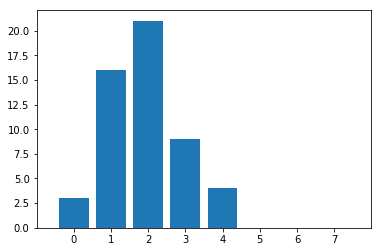

Accuracy:  90.56603773584906


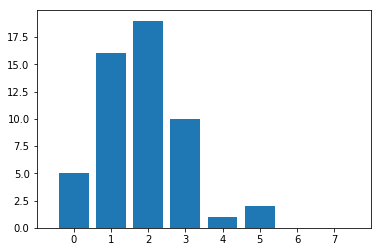

Accuracy:  94.33962264150944


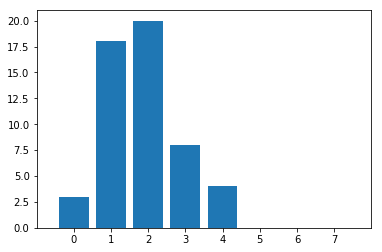

Accuracy:  94.33962264150944


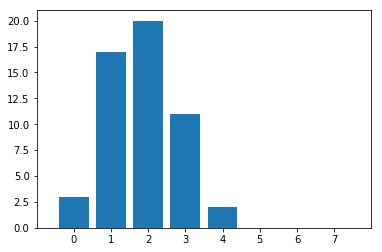

Accuracy:  90.56603773584906


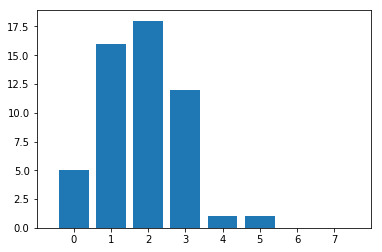

Accuracy:  88.67924528301887


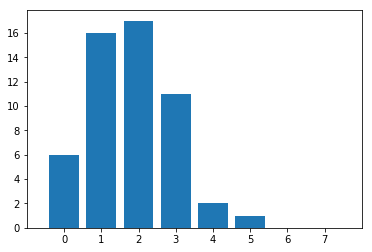

Accuracy:  94.33962264150944


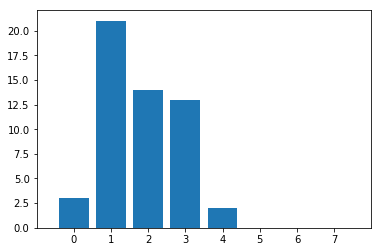

In [41]:
n = 7
print(t_accuracy[:n])

a = [x[0].split('_') for x in t_accuracy[:n] ] 
print(a)
for xx in a:
    test_pred = []
    s = ''
    combine_prediction(xx, test_pred)
    all_pred = [] ;
    for i in range(len(test_pred)):
        if ( i == 0 ):
            all_pred = test_pred[i]
        else:
            all_pred = np.column_stack((all_pred, test_pred[i]) )

    top_seven = []
    for i in range(len(all_pred)):
        unique, counts = np.unique(all_pred[i], return_counts=True)
        x = dict(zip(unique, counts))
        sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
        l = list(islice([int(x) for x,y in sorted_x],top_n))
        while ( len(l) < top_n ):
          l.append(-1)
        top_seven.append(l)


    columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
    df_top_seven = pd.DataFrame(top_seven, columns=columns)
    r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
    print ( "Accuracy: ",  r)
    dict_accuracy.update({s: r})
    mtr.plot_matched_counts(df_top_seven.values)




In [ ]:

# Nov 26
# 16 22 28 31 38 46 33

In [42]:
#Keep track of all results
#df_predictions = []

#print(df_predictions)
#mtr = MyTotoResearch(algo_no=1)
def getAllData(df):
#     drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
#     X = df.drop(drop_cols, axis=1)

    use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
    X = df[use_cols]
    return X

lresult, df = mtr.load_totodata()

test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAllData(test_data)) #

print(len(df_predictions))
for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n].astype(int))))
    mtr.print_predictions(df_predictions[n].astype(int))



1521
6
69.81132075471697
20180514   [17 24 29 45 46 49  5]   [ 8 18 22 32 41 45]   [45]
20180517   [ 7 21 25 29 35 37 13]   [ 9 18 22 32 41 45]   []
20180521   [ 8 10 16 30 37 44 17]   [ 8 18 22 32 41 45]   [8]
20180524   [11 25 26 34 36 42 16]   [ 8 18 22 32 41 45]   []
20180528   [ 5  9 27 28 30 44  2]   [ 8 18 22 32 41 45]   []
20180531   [11 13 24 26 47 49 33]   [28 32 34 37 43 45]   []
20180604   [20 22 31 37 43 45 27]   [ 8 18 22 32 41 45]   [22 45]
20180607   [12 20 29 31 37 39 42]   [ 8 18 31 32 35 45]   [31]
20180611   [16 25 30 37 44 49 34]   [ 8 23 24 32 41 45]   []
20180614   [ 4 29 31 35 42 48  1]   [ 8 15 21 32 41 45]   []
20180618   [11 15 22 23 26 43 25]   [ 8 18 22 32 41 45]   [22]
20180621   [ 4  6 15 24 30 35 46]   [ 8 18 22 32 41 45]   []
20180625   [ 2  5 25 38 44 48  9]   [ 8 18 22 32 41 45]   []
20180628   [ 2  7 22 27 40 47 48]   [ 8 18 22 32 41 45]   [22]
20180702   [12 13 26 33 35 38 23]   [ 8 18 22 32 41 45]   []
20180705   [ 8 11 28 30 32 34 39]   [ 8 18 22 

20180611   [16 25 30 37 44 49 34]   [11 17 23 29 35 41]   []
20180614   [ 4 29 31 35 42 48  1]   [11 17 23 29 35 41]   [29 35]
20180618   [11 15 22 23 26 43 25]   [11 17 23 29 35 41]   [11 23]
20180621   [ 4  6 15 24 30 35 46]   [11 17 23 29 35 41]   [35]
20180625   [ 2  5 25 38 44 48  9]   [11 17 23 29 35 41]   []
20180628   [ 2  7 22 27 40 47 48]   [11 17 23 29 35 41]   []
20180702   [12 13 26 33 35 38 23]   [11 17 23 29 35 41]   [23 35]
20180705   [ 8 11 28 30 32 34 39]   [11 17 23 29 35 41]   [11]
20180709   [ 6 23 31 38 39 43 33]   [11 17 23 29 35 41]   [23]
20180712   [ 4 15 25 32 40 41 10]   [11 17 23 29 35 41]   [41]
20180716   [ 4  8 19 24 32 47 22]   [11 17 23 29 35 41]   []
20180719   [13 14 23 35 37 46 45]   [11 17 23 29 35 41]   [23 35]
20180723   [ 2 23 26 28 39 40 12]   [11 17 23 29 35 41]   [23]
20180726   [ 1  9 13 17 28 40 37]   [11 17 23 29 35 41]   [17]
20180730   [ 8 10 19 20 41 43  7]   [11 17 23 29 35 41]   [41]
20180802   [ 1 10 15 27 41 46 35]   [11 17 23 29 35